In [1]:
import pickle
from sklearn.model_selection import train_test_split
with open('Image-Dev-01.pkl','rb') as ifp:
    files,y_unique,X,y = pickle.load(ifp)

# Build Keras Model

We first need to split our data into training and test (sometimes called validation) segments.

There is an easy way to do this - train_test_split

In [2]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
print(f"We have {X_train.shape[0]:5d} Training samples")
print(f"We have {X_test.shape[0]:5d} Test samples")

We have   343 Training samples
We have   169 Test samples


In [3]:
num_classes=len(list(set(y)))
print(f"We are trying to predict {num_classes} classes.")

We are trying to predict 2 classes.


In [4]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout , MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import adam_v2 
from keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report,confusion_matrix

import tensorflow as tf


/Users/tim/.pyml/lib/python3.9/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.12.2 when it was built against 1.12.1, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "


In [5]:
model = Sequential()
# Make 64 Output Channels using a pixel size of 8,8
model.add(Conv2D(64, kernel_size=(8, 8), activation='relu', input_shape=(X_train[1].shape)))
model.add(Dropout(0.3))
model.add(MaxPooling2D(pool_size=(6, 6)))
# model.add(Conv2D(128, kernel_size=(8, 8), activation='relu'))
# model.add(Dropout(0.3))
# model.add(MaxPooling2D(pool_size=(8, 8)))
#This will produce the previous dimension in shapes i.e. (38,58,64)-> 141056
model.add(Flatten())
model.add(Dense(num_classes*4, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))
model.summary()
model.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False) , metrics = ['accuracy'])

# simple early stopping
#es = EarlyStopping(monitor='val_loss', mode='min', verbose=1)
# More patient Early stopping 
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=7)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 93, 93, 64)        4160      
                                                                 
 dropout (Dropout)           (None, 93, 93, 64)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 64)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 14400)             0         
                                                                 
 dense (Dense)               (None, 8)                 115208    
                                                                 
 dense_1 (Dense)             (None, 2)                 18        
                                                        

In [6]:
history = model.fit(X_train,y_train,epochs = 400 , validation_data = (X_test, y_test),callbacks=[es])

Epoch 1/400


2023-05-06 08:34:55.607347: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


11/11 [==============================] - 1s 94ms/step - loss: 0.8858 - accuracy: 0.4985 - val_loss: 0.6943 - val_accuracy: 0.4734
Epoch 2/400
11/11 [==============================] - 1s 89ms/step - loss: 0.7069 - accuracy: 0.5190 - val_loss: 0.6939 - val_accuracy: 0.4734
Epoch 3/400
11/11 [==============================] - 1s 87ms/step - loss: 0.6994 - accuracy: 0.5073 - val_loss: 0.6928 - val_accuracy: 0.4852
Epoch 4/400
11/11 [==============================] - 1s 88ms/step - loss: 0.6882 - accuracy: 0.5131 - val_loss: 0.6821 - val_accuracy: 0.5799
Epoch 5/400
11/11 [==============================] - 1s 91ms/step - loss: 0.7105 - accuracy: 0.5685 - val_loss: 0.6853 - val_accuracy: 0.5385
Epoch 6/400
11/11 [==============================] - 1s 88ms/step - loss: 0.6863 - accuracy: 0.5277 - val_loss: 0.6879 - val_accuracy: 0.5266
Epoch 7/400
11/11 [==============================] - 1s 88ms/step - loss: 0.6869 - accuracy: 0.5569 - val_loss: 0.6762 - val_accuracy: 0.5266
Epoch 8/400
11/11 

Train: 0.959, Test: 0.888


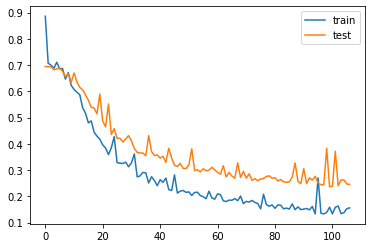

In [7]:
from matplotlib import pyplot
_, train_acc = model.evaluate(X_train, y_train, verbose=0)
_, test_acc = model.evaluate(X_test, y_test, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))
# plot training history
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

# Save the Model

Building the model - can take a long time.
We can have keras auto-save - but I have not done that here.

Let us assume we think this model will work - so lets save it.

In [8]:
model.save('model/v0.0a')

2023-05-06 08:37:39.385956: W tensorflow/python/util/util.cc:368] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


INFO:tensorflow:Assets written to: model/v0.0a/assets
